<a href="https://colab.research.google.com/github/gangavdevi/player-potential-project/blob/master/exit_test_bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data=pd.read_csv("/content/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [3]:
#rename the column y
data.rename(columns={'y':'Target'},inplace=True)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  Target     10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [6]:
#check for rows and columns
data.shape

(10861, 17)

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [9]:
#check null values
data.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [10]:
#check unique values of default
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data['duration'].unique()

array([1042., 1467., 1389., ..., 1611., 1185., 2260.])

In [12]:
# numerical Features

numerical=data.select_dtypes(include=['int64','float64']).columns
numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
#check for the dtypes of numerical
print(data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].dtypes)


age           int64
balance     float64
day         float64
duration    float64
campaign      int64
pdays       float64
previous      int64
dtype: object


In [14]:
#find columns with missing values
data.columns[data.isnull().any()]


Index(['job', 'education', 'balance', 'loan', 'contact', 'day', 'duration',
       'pdays'],
      dtype='object')

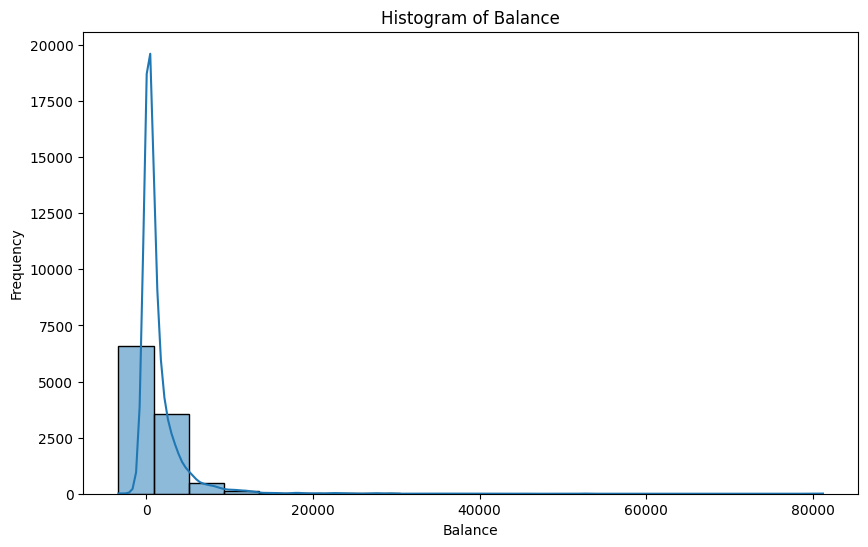

In [15]:
#histogram of balance
plt.figure(figsize=(10,6))
sns.histplot(data['balance'],bins=20,kde=True)
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

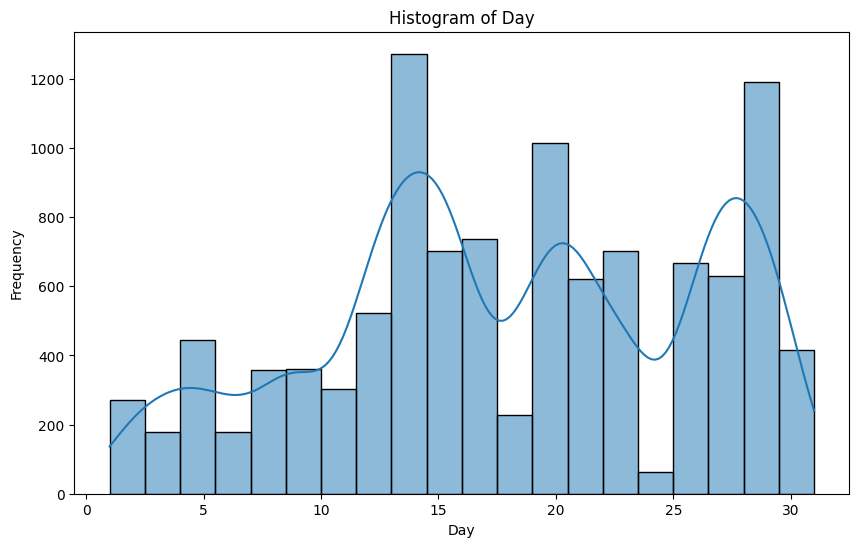

In [16]:
#histogram of day
plt.figure(figsize=(10,6))
sns.histplot(data['day'],bins=20,kde=True)
plt.title('Histogram of Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

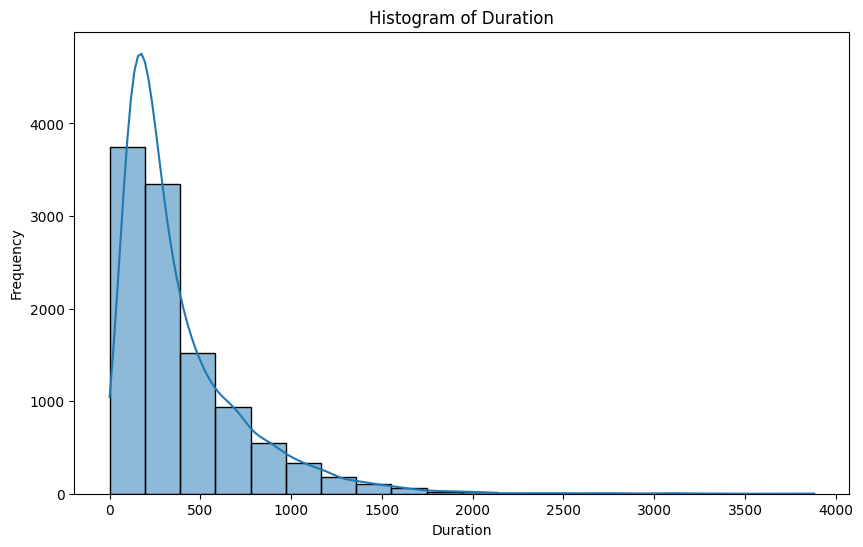

In [17]:
#hist of duration
plt.figure(figsize=(10,6))
sns.histplot(data['duration'],bins=20,kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

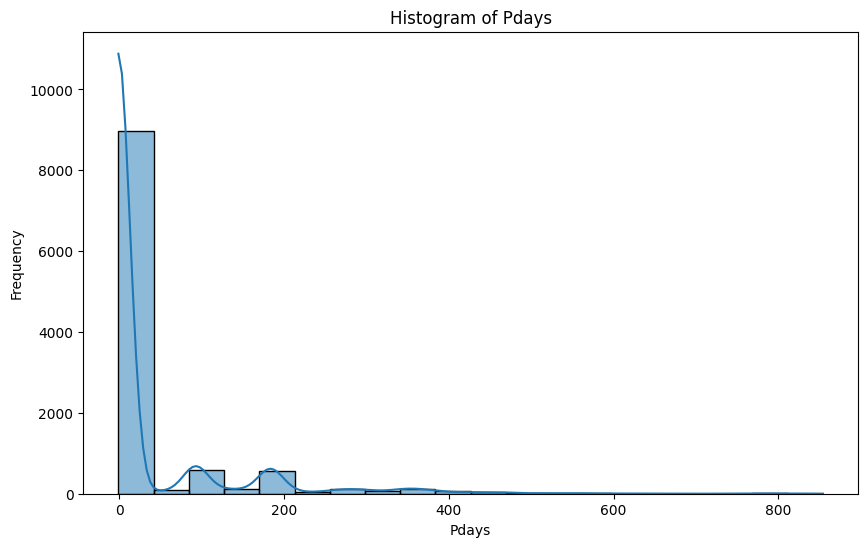

In [18]:
#hist of pdays
plt.figure(figsize=(10,6))
sns.histplot(data['pdays'],bins=20,kde=True)
plt.title('Histogram of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

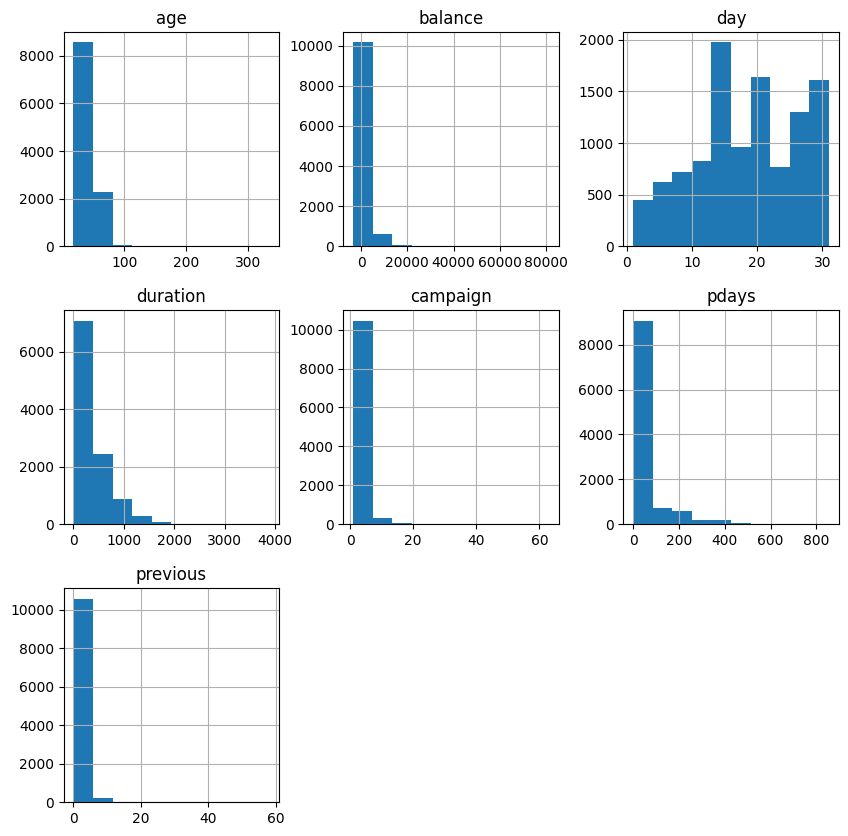

In [19]:
#histogram of the columns
data.hist(figsize=(10,10))
plt.show()

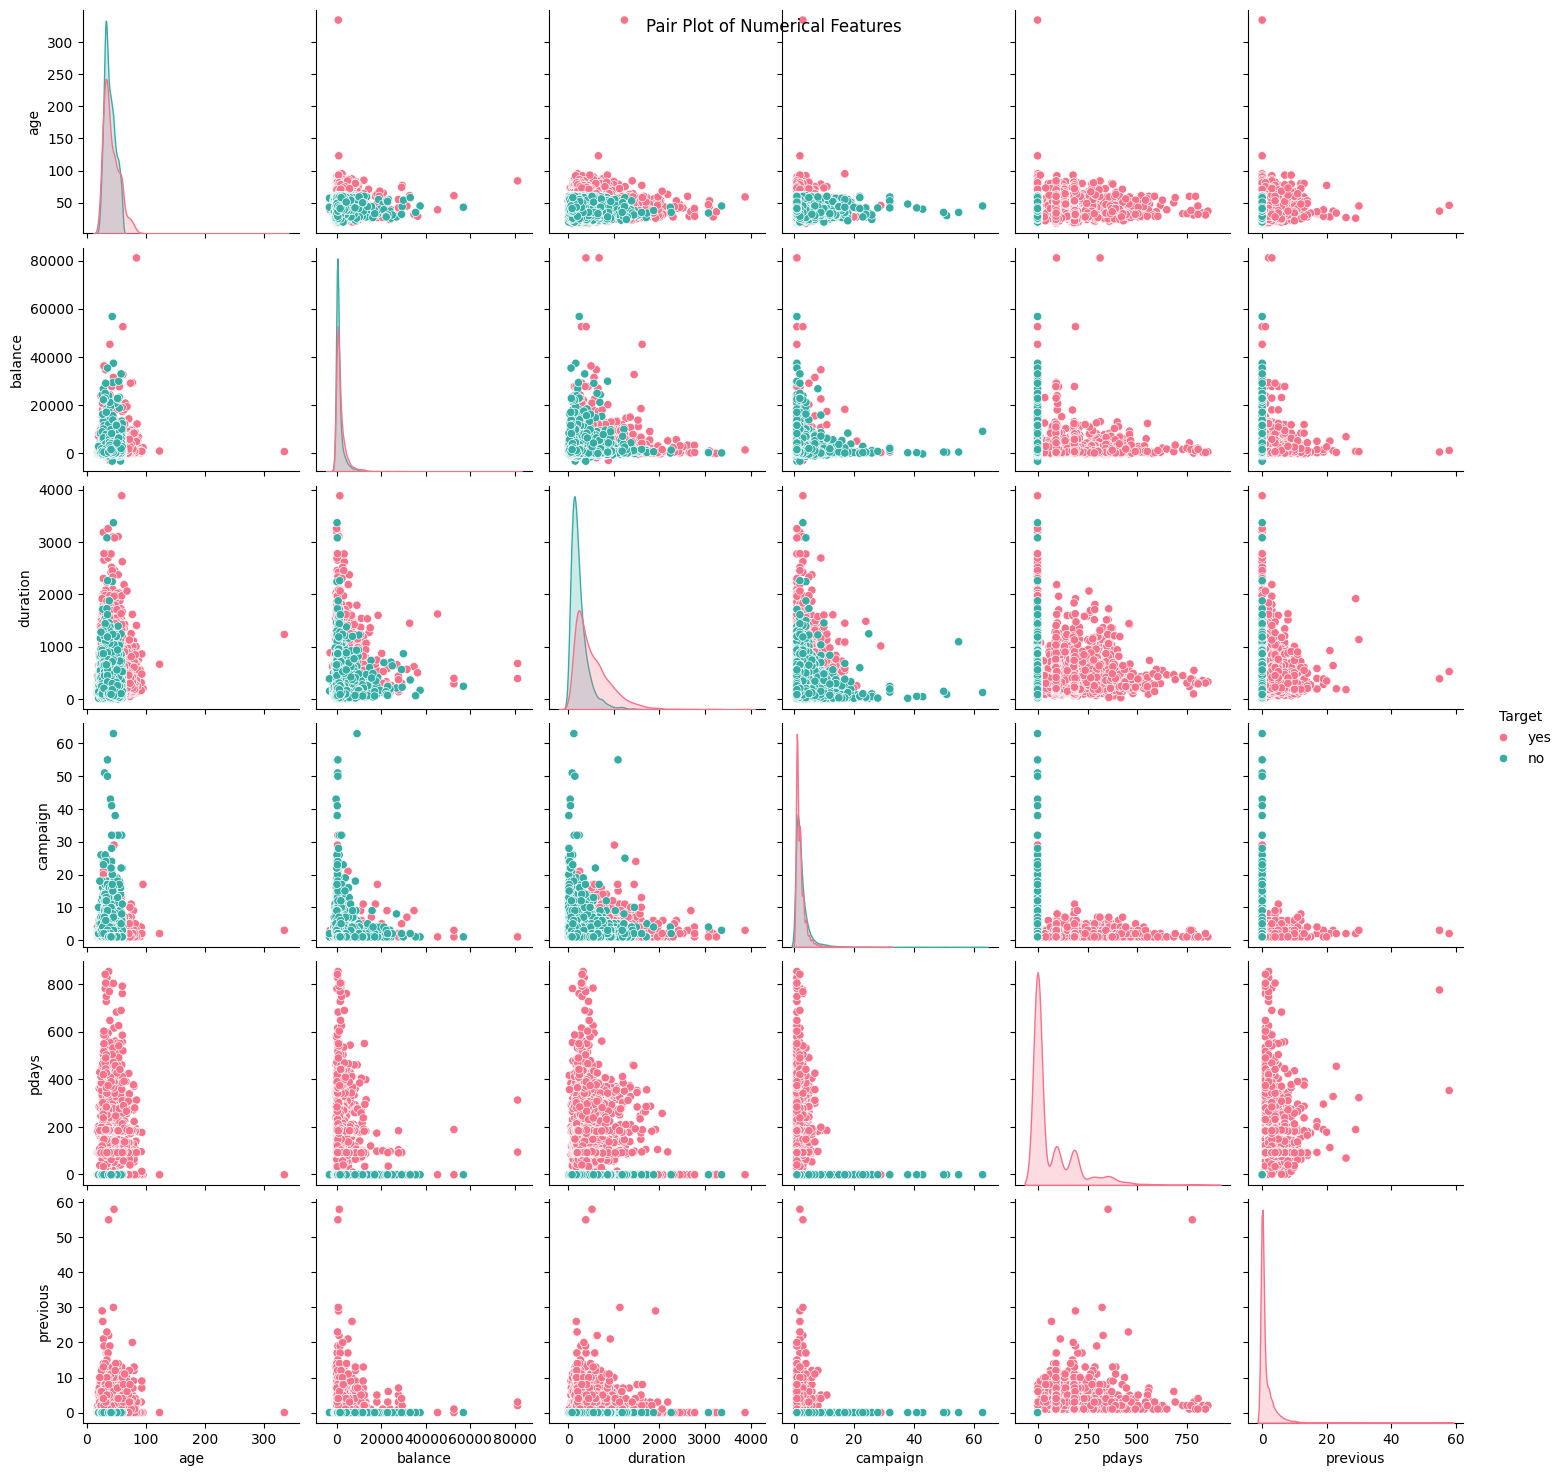

In [20]:
#pairplot of numerical features
sns.pairplot(data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Target']], hue='Target', palette="husl")
plt.suptitle('Pair Plot of Numerical Features')
plt.show()


In [21]:
#handle missing values of numerical columns with median
data['balance'].fillna(data['balance'].median(),inplace=True)
data['day'].fillna(data['day'].median(),inplace=True)
data['duration'].fillna(data['duration'].median(),inplace=True)
data['pdays'].fillna(data['pdays'].median(),inplace=True)


In [22]:
#handling missing values of the categorical columns
data['job']=data['job'].fillna(data['job'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['loan']=data['loan'].fillna(data['loan'].mode()[0])
data['contact']=data['contact'].fillna(data['contact'].mode()[0])

In [23]:
#null values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


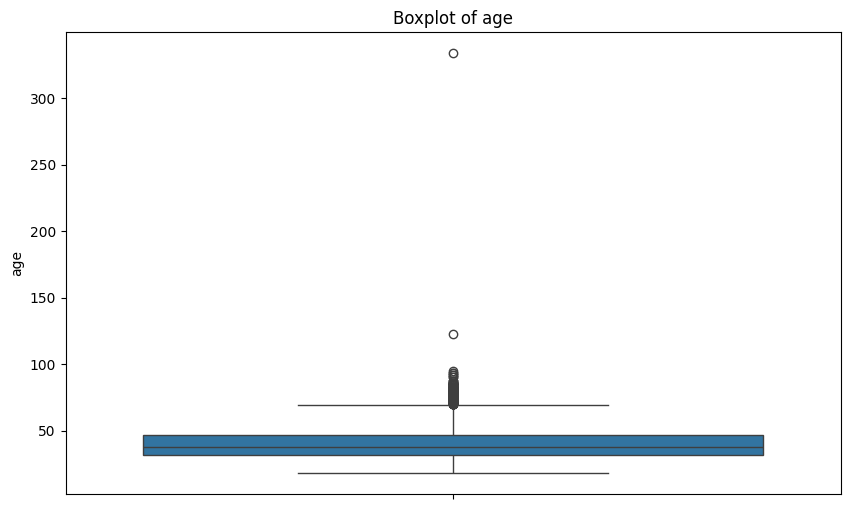

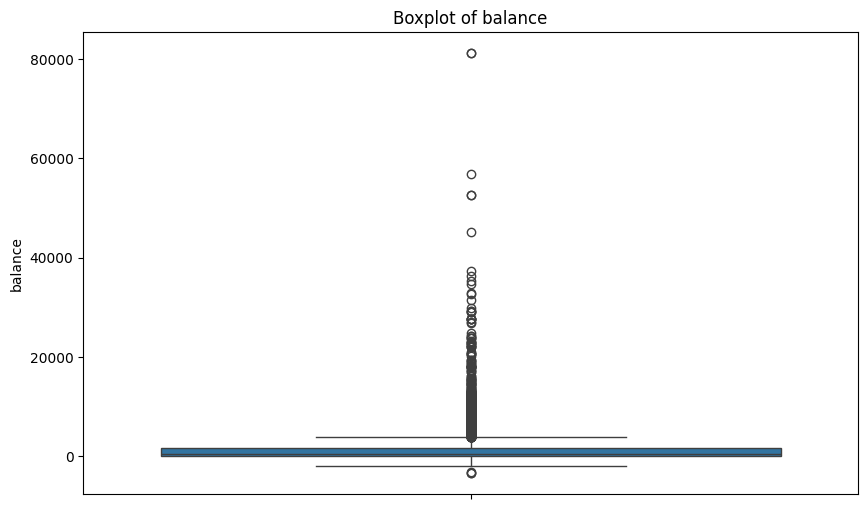

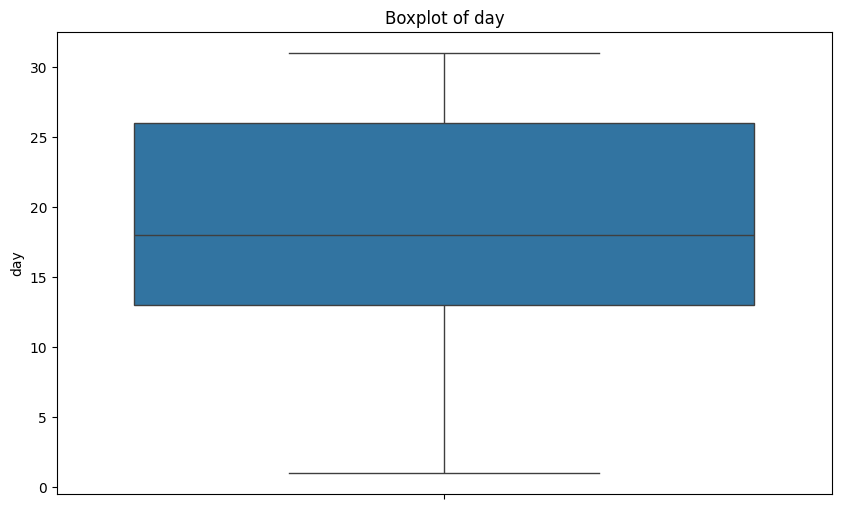

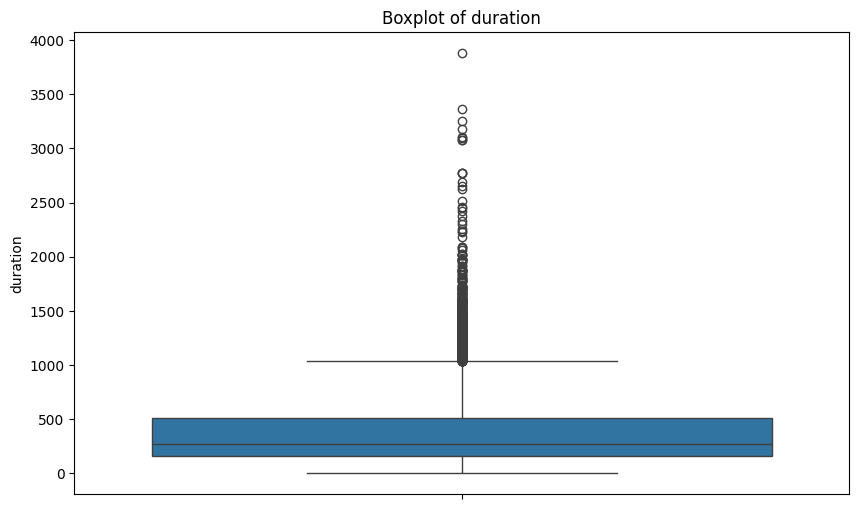

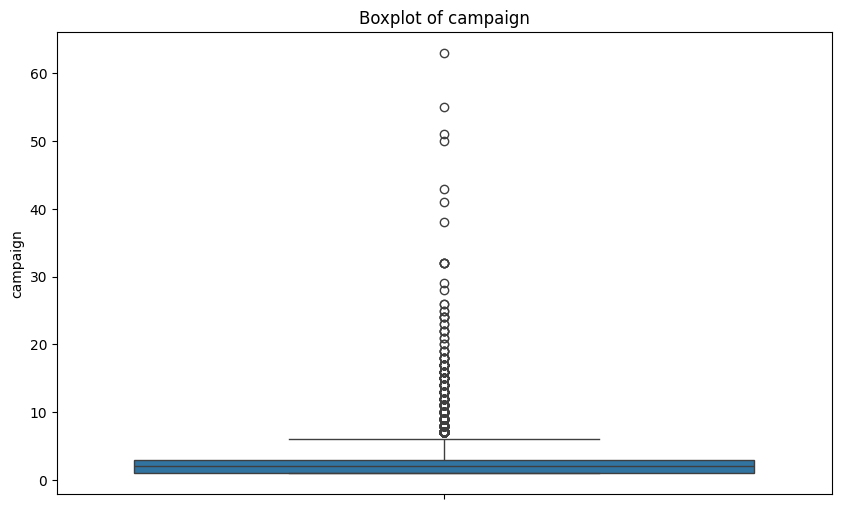

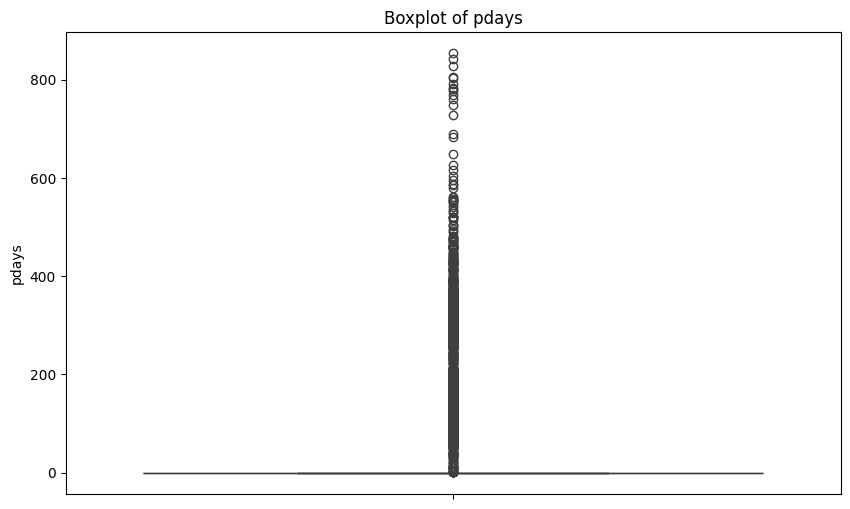

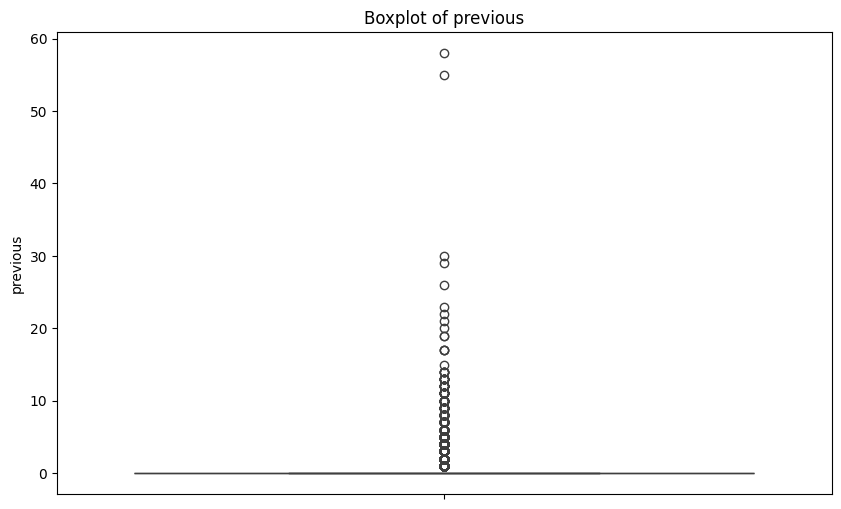

In [24]:
#check for outliers of numerical
for col in numerical:
  plt.figure(figsize=(10,6))
  sns.boxplot(data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [25]:
#check unique values of age
data['age'].unique()

array([ 59,  56,  41,  55,  54,  42,  60,  39,  37,  34,  28,  30,  36,
        45,  53,  38,  29,  46,  31,  35,  32,  49,  43,  26,  40,  33,
        24,  23,  48,  52,  57,  51,  44,  50,  27,  47, 334,  25, 123,
        58,  61,  62,  68,  75,  22,  69,  64,  66,  85,  72,  90,  67,
        71,  21,  63,  73,  74,  65,  83,  79,  70,  76,  77,  19,  20,
        78,  95,  82,  18,  86,  84,  87,  92,  81,  80,  93])

In [26]:
# Removing outliers using IQR method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]


In [27]:
#check unique value of job
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'unemployed', 'blue-collar', 'entrepreneur', 'housemaid',
       'self-employed', 'unknown', 'student'], dtype=object)

In [28]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [30]:
#categorical coluns
categorical=data.select_dtypes(include=['object']).columns
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [31]:
#label encoding for categorical columns
le=LabelEncoder()
for col in categorical:
  data[col]=le.fit_transform(data[col])
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1
4,54,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3,1


In [32]:
df=data.corr()

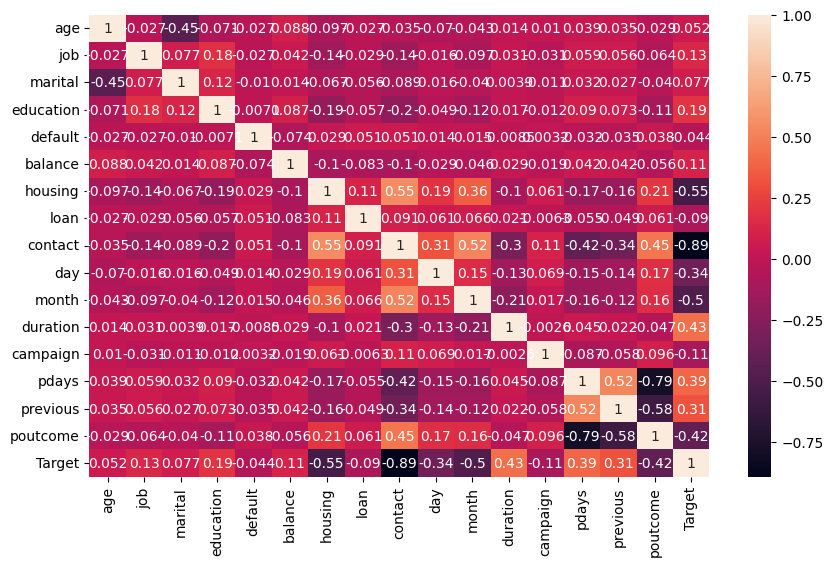

In [33]:
#to check correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
# #scaling the numerical columns without target

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# data[numerical]=sc.fit_transform(data[numerical])
# data.head()

In [35]:
# Define features (X) and target (y)
y = data['Target']
X = data.drop('Target', axis=1)


In [36]:
#print x
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3
4,54,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3


In [37]:
y.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [38]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
data['Target']

,Target
0,1
1,1
2,1
3,1
4,1
...,...
10856,0
10857,0
10858,0
10859,0


In [40]:
#Train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = rf_classifier.predict(X_test)


In [42]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [43]:
print(accuracy)

0.984


In [44]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1113
           1       0.99      0.97      0.98      1012

    accuracy                           0.98      2125
   macro avg       0.98      0.98      0.98      2125
weighted avg       0.98      0.98      0.98      2125



In [45]:
print(confusion_mat)

[[1106    7]
 [  27  985]]


In [46]:
#train model using knn
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [49]:
print(accuracy)

0.7863529411764706


In [50]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1113
           1       0.81      0.71      0.76      1012

    accuracy                           0.79      2125
   macro avg       0.79      0.78      0.78      2125
weighted avg       0.79      0.79      0.78      2125



In [51]:
print(confusion_mat)

[[949 164]
 [290 722]]


In [52]:
#svm
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [53]:
#evaluate the model
y_pred = classifier.predict(X_test)

In [54]:
print(accuracy_score(y_test, y_pred))

0.7910588235294118


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1113
           1       0.85      0.68      0.76      1012

    accuracy                           0.79      2125
   macro avg       0.80      0.79      0.79      2125
weighted avg       0.80      0.79      0.79      2125



In [56]:
print(confusion_matrix(y_test, y_pred))

[[992 121]
 [323 689]]


In [ ]:
#hyperparameter tuning on random forest classifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}



# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=2,  # Display progress
                           scoring='accuracy')  # Evaluate performance based on accuracy

# Fit GridSearchCV to the data (use training data)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
